In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AR as AutoRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

from sklearn.tree import DecisionTreeRegressor
from yellowbrick.regressor import ResidualsPlot
import math

import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
df_chatelet = pd.read_csv("https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/qualite-de-lair-mesuree-dans-la-station-chatelet.csv", sep=";")
df_auber = pd.read_csv("https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/qualite-de-lair-mesuree-dans-la-station-auber.csv", sep=";")
df_roosevelt = pd.read_csv("https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt.csv", sep=";")

# 1. Exploratory data analysis

In [4]:
df_chatelet.head()

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2021-10-18T02:00:00+02:00,4,21,45,471,"20,5","44,5"
1,2021-10-18T01:00:00+02:00,4,21,37,474,"20,3","44,5"
2,2021-10-18T00:00:00+02:00,4,23,47,497,"20,5","44,8"
3,2021-10-17T23:00:00+02:00,4,20,62,518,"19,7","45,6"
4,2021-10-17T22:00:00+02:00,3,20,79,567,"19,1","45,2"


In [5]:
df_chatelet.sort_values(by='DATE/HEURE').head(15)

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
76869,2013-01-01T02:00:00+01:00,6,31,182,776,"21,5","46,2"
76868,2013-01-01T03:00:00+01:00,6,30,166,800,"21,6","47,3"
76867,2013-01-01T04:00:00+01:00,4,27,124,799,"21,8",47
76866,2013-01-01T05:00:00+01:00,3,25,85,715,"21,6","45,8"
76865,2013-01-01T06:00:00+01:00,4,26,102,622,"21,2","45,9"
76864,2013-01-01T07:00:00+01:00,3,26,146,563,"20,9",46
76863,2013-01-01T08:00:00+01:00,7,30,134,538,"20,9","45,4"
76862,2013-01-01T09:00:00+01:00,7,30,144,523,21,"45,4"
76861,2013-01-01T10:00:00+01:00,7,31,128,517,"20,9","45,2"
76860,2013-01-01T11:00:00+01:00,7,34,116,535,"20,7","43,8"


There is one record per hour.

In [6]:
df_roosevelt.sort_values(by='date/heure').tail(10)

,date/heure,NO,NO2,PM10,CO2,TEMP,HUMI
9,2021-10-17T17:00:00+02:00,5,28,26,607,"20,5",38
8,2021-10-17T18:00:00+02:00,3,23,28,632,"20,6","36,7"
7,2021-10-17T19:00:00+02:00,4,25,39,605,"20,5","36,4"
6,2021-10-17T20:00:00+02:00,4,27,52,595,"20,4","36,9"
5,2021-10-17T21:00:00+02:00,5,32,52,578,"20,1","37,7"
4,2021-10-17T22:00:00+02:00,5,37,50,551,"19,9","39,6"
3,2021-10-17T23:00:00+02:00,7,40,48,532,"20,2","40,8"
2,2021-10-18T00:00:00+02:00,6,44,42,522,"20,7","40,5"
1,2021-10-18T01:00:00+02:00,7,46,35,512,"20,5","40,6"
0,2021-10-18T02:00:00+02:00,9,44,34,516,"20,3","40,9"


In [7]:
df_chatelet.describe()

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
count,76870,55541,63479,64253,64566,66285,66296
unique,76869,350,139,782,744,226,747
top,2019-10-27T03:00:00+01:00,ND,ND,ND,ND,"20,3","42,1"
freq,2,5240,4606,2366,2783,812,378


In [8]:
df_auber.describe()

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI
count,67242,67242,67242,67242,67242,67242,67242,67242
unique,67237,633,436,816,403,584,219,469
top,2017-11-07T23:00:00+01:00,ND,ND,ND,ND,ND,ND,ND
freq,2,26955,26704,24466,25254,26655,23539,23528


In [9]:
df_roosevelt.describe()

,date/heure,NO,NO2,PM10,CO2,TEMP,HUMI
count,76870,71691,72231,73947,72085,74968,74961
unique,76869,393,194,418,429,295,720
top,2019-10-27T03:00:00+01:00,ND,ND,27,ND,"17,1","47,7"
freq,2,3513,2688,1561,2777,642,328


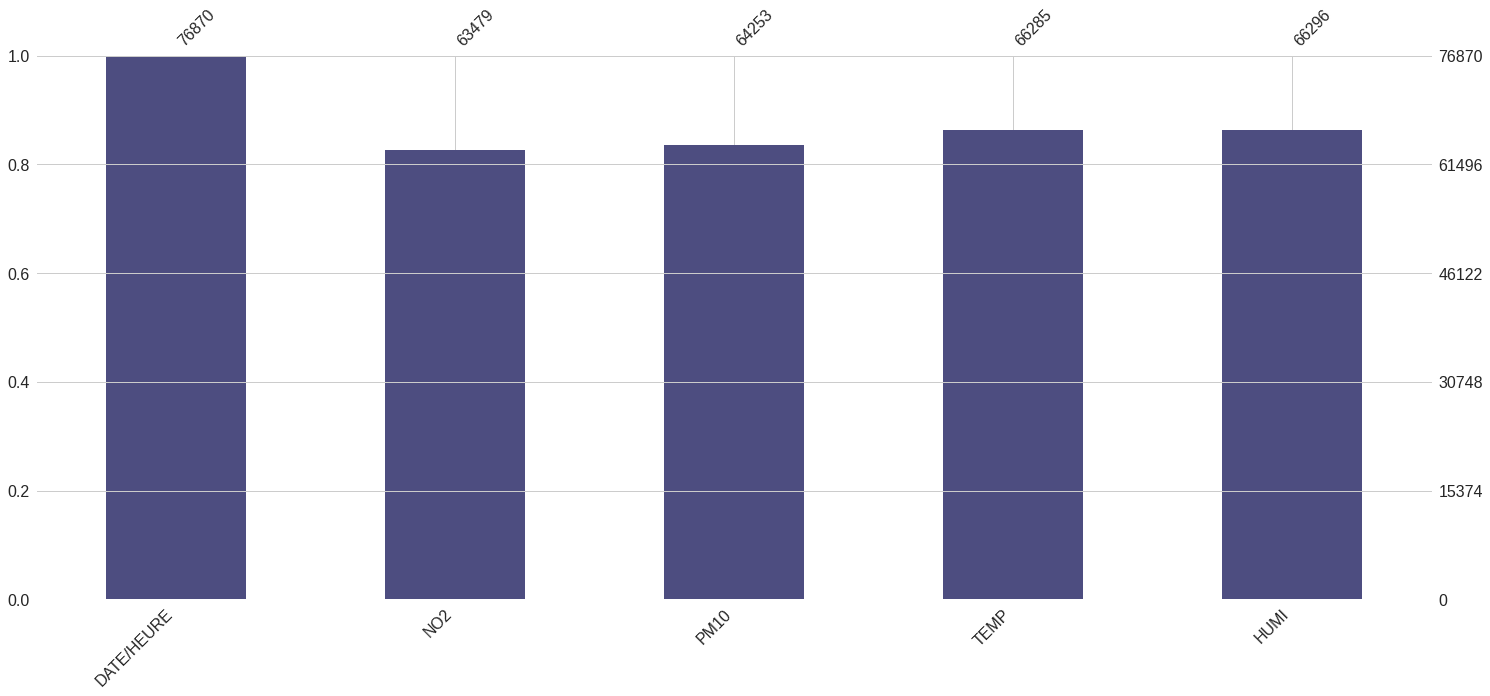

In [10]:
import missingno
missingno.bar(df_chatelet[['DATE/HEURE', 'NO2', 'PM10', 'TEMP', 'HUMI']], color=(0.3, 0.3, 0.5))

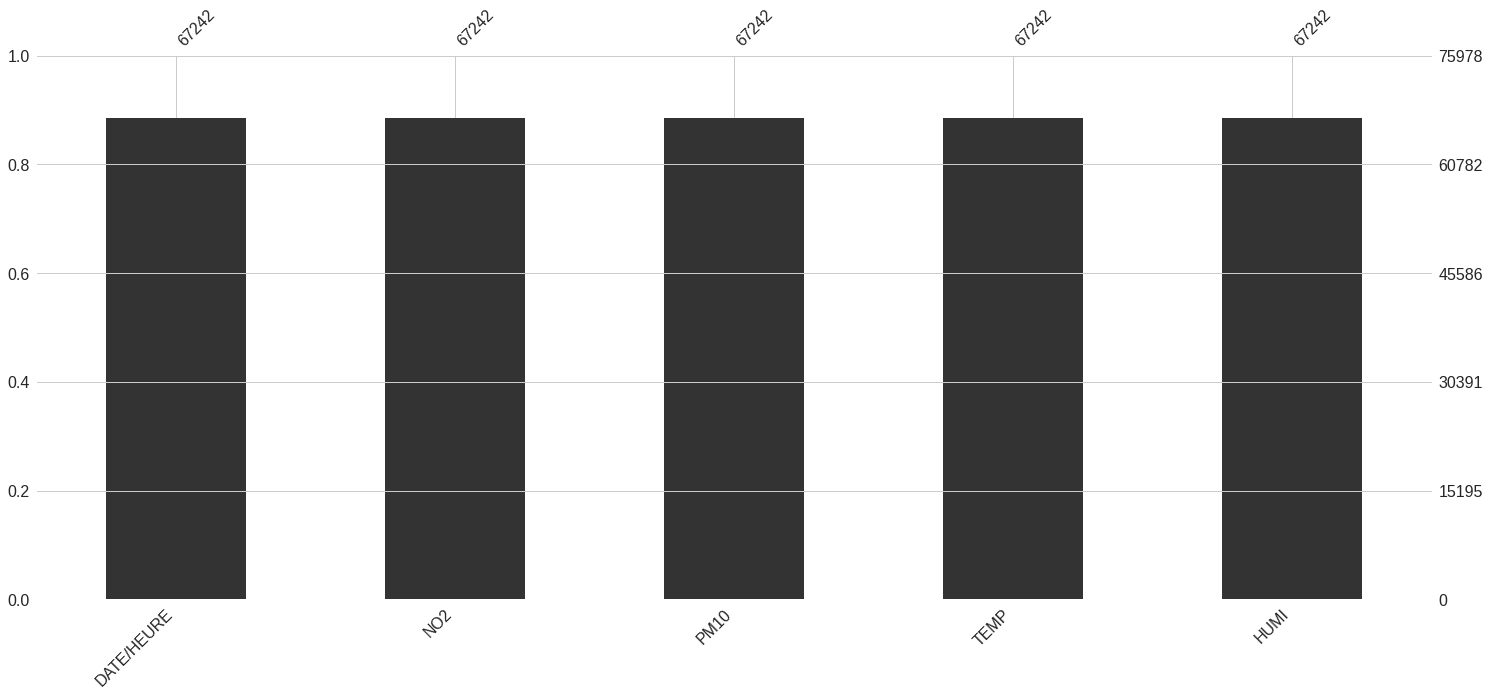

In [11]:
missingno.bar(df_auber[['DATE/HEURE', 'NO2', 'PM10', 'TEMP', 'HUMI']], color=(0.2, 0.2, 0.2))

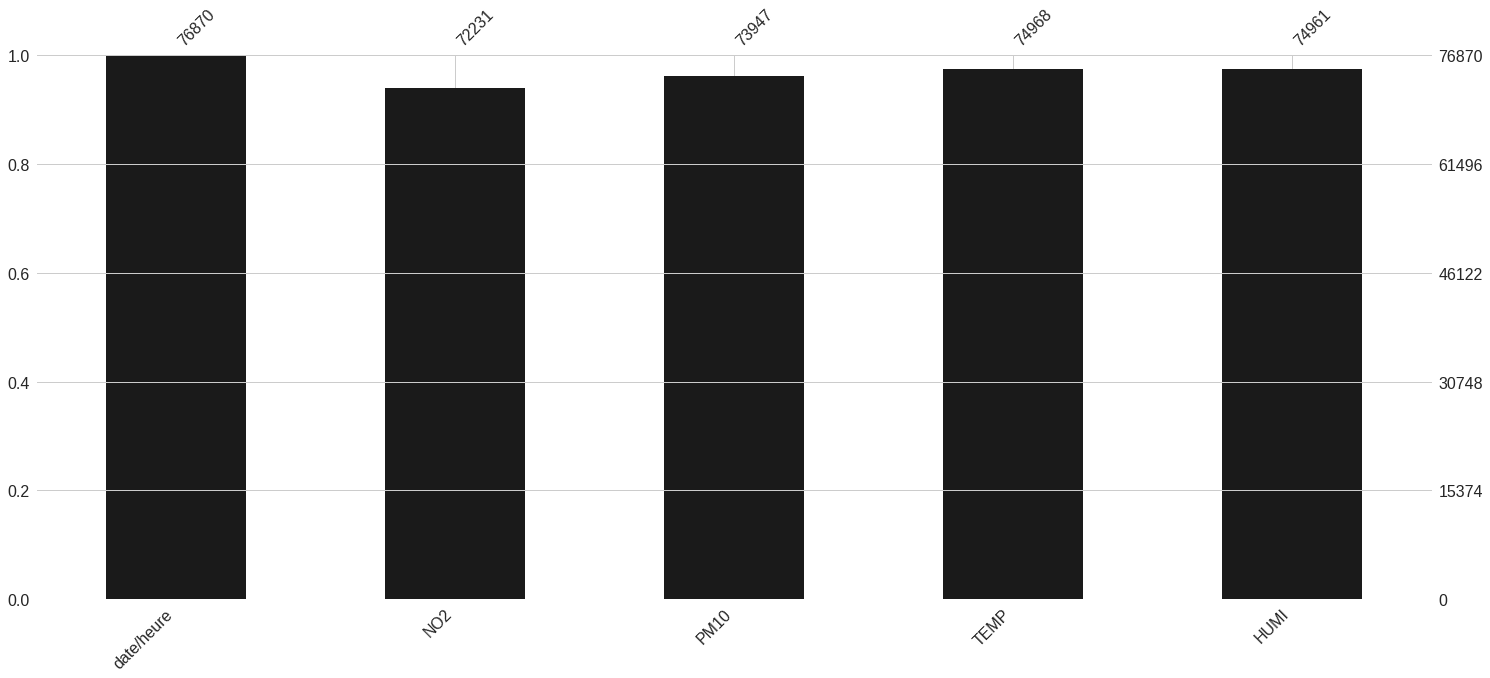

In [12]:
missingno.bar(df_roosevelt[['date/heure', 'NO2', 'PM10', 'TEMP', 'HUMI']], color=(0.1, 0.1, 0.1))

# 2. Data preprocessing

In [13]:
df_roosevelt = df_roosevelt.rename(columns={'date/heure': 'DATE/HEURE'})

In [14]:
def date_formatting_chatelet(timestamp):
    timestamp = str(timestamp)
    return datetime.strptime(timestamp,"%Y-%m-%d %H:%M:%S")

def date_formatting_other(timestamp):
    timestamp = str(timestamp)
    timestamp=timestamp[:19]
    return datetime.strptime(timestamp,"%Y-%m-%dT%H:%M:%S")

In [15]:
df_chatelet['DATE/HEURE'] = df_chatelet['DATE/HEURE'].apply(lambda x: date_formatting_other(x))

In [16]:
df_auber = df_auber.dropna()
df_auber['DATE/HEURE'] = df_auber['DATE/HEURE'].apply(lambda x: date_formatting_other(x))

In [17]:
df_roosevelt['DATE/HEURE'] = df_roosevelt['DATE/HEURE'].apply(lambda x: date_formatting_other(x))

In [18]:
def add_cols(df):
    df['hour'] = df['DATE/HEURE'].apply(lambda x: x.hour)
    df['weekday'] = df['DATE/HEURE'].apply(lambda x: x.weekday())
    df['month'] = df['DATE/HEURE'].apply(lambda x: x.month)

In [19]:
df_chatelet['NO'].replace({"<2": "2", "ND":"0", "nan":None}, inplace=True)
df_chatelet = df_chatelet.dropna()
df_auber['NO'].replace({'ND':None}, inplace=True)
df_auber['PM2.5'].replace({'ND':None}, inplace=True)
df_auber = df_auber.dropna()

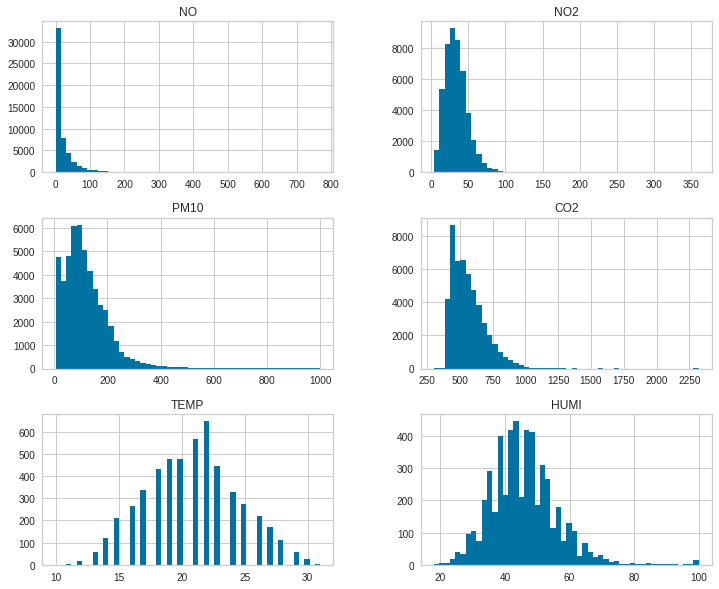

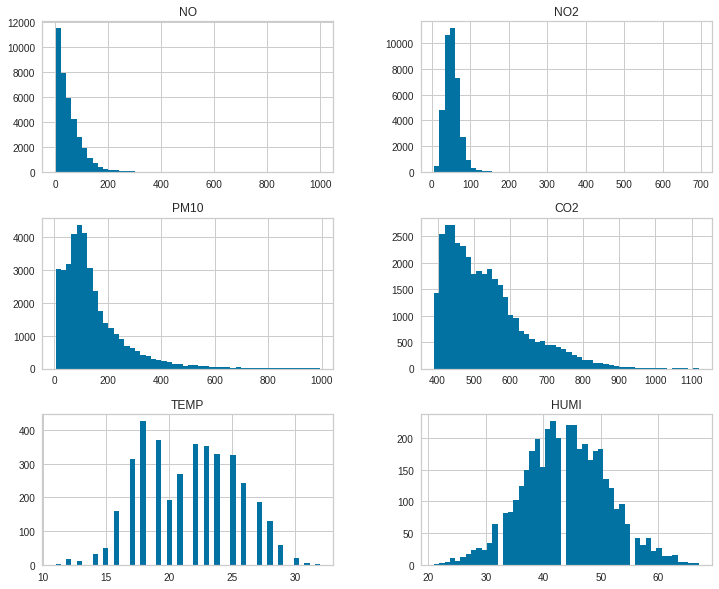

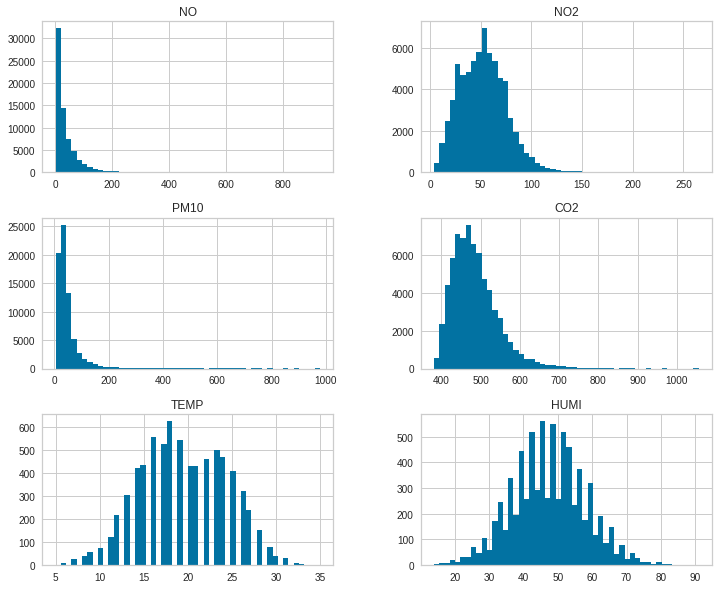

In [20]:
col = ['NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI']
for i in col:
  df_chatelet[i] = pd.to_numeric(df_chatelet[i], errors='coerce')
df_chatelet.hist(figsize=(12,10), bins=50);

col = ['NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI']
for i in col:
  df_auber[i] = pd.to_numeric(df_auber[i], errors='coerce')
df_auber.hist(figsize=(12,10), bins=50);

col = ['NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI']
for i in col:
  df_roosevelt[i] = pd.to_numeric(df_roosevelt[i], errors='coerce')
df_roosevelt.hist(figsize=(12,10), bins=50);

In [21]:
add_cols(df_chatelet)
df_chatelet.sort_values(by = 'DATE/HEURE', ascending=True, inplace = True)
df_chatelet['CO2'] = df_chatelet['CO2'].fillna(df_chatelet['CO2'].interpolate().fillna(method="backfill", axis=None))
df_chatelet['TEMP'] = df_chatelet['TEMP'].fillna(df_chatelet['TEMP'].interpolate().fillna(method="backfill", axis=None))
df_chatelet['HUMI'] = df_chatelet['HUMI'].fillna(df_chatelet['HUMI'].interpolate().fillna(method="backfill", axis=None))
df_chatelet['NO2'] = df_chatelet['NO2'].fillna(df_chatelet['NO2'].interpolate().fillna(method="backfill", axis=None))
df_chatelet['PM10'] = df_chatelet['PM10'].fillna(df_chatelet['PM10'].interpolate().fillna(method="backfill", axis=None))

In [22]:
add_cols(df_auber)
df_auber.sort_values(by = 'DATE/HEURE', ascending=True, inplace = True)
df_auber['CO2'] = df_auber['CO2'].fillna(df_auber['CO2'].interpolate().fillna(method="backfill", axis=None))
df_auber['TEMP'] = df_auber['TEMP'].fillna(df_auber['TEMP'].interpolate().fillna(method="backfill", axis=None))
df_auber['HUMI'] = df_auber['HUMI'].fillna(df_auber['HUMI'].interpolate().fillna(method="backfill", axis=None))
df_auber['PM2.5'] = df_auber['PM2.5'].astype(str)
df_auber['PM2.5'].replace({'ND':None}, inplace=True)
df_auber['PM2.5'] = pd.to_numeric(df_auber['PM2.5'], errors='coerce')
df_auber['PM2.5'] = df_auber['PM2.5'].fillna(df_auber['PM2.5'].interpolate().fillna(method="backfill", axis=None))
df_auber['NO'] = df_auber['NO'].fillna(df_auber['NO'].interpolate().fillna(method="backfill", axis=None))
df_auber['PM10'] = df_auber['PM10'].fillna(df_auber['PM10'].interpolate().fillna(method="backfill", axis=None))
df_auber['NO2'] = df_auber['NO2'].fillna(df_auber['NO2'].interpolate().fillna(method="backfill", axis=None))

In [23]:
add_cols(df_roosevelt)
df_roosevelt.sort_values(by = 'DATE/HEURE', ascending=True, inplace = True)
df_roosevelt['CO2'] = df_roosevelt['CO2'].fillna(df_roosevelt['CO2'].interpolate().fillna(method="backfill", axis=None))
df_roosevelt['TEMP'] = df_roosevelt['TEMP'].fillna(df_roosevelt['TEMP'].interpolate().fillna(method="backfill", axis=None))
df_roosevelt['NO'] = df_roosevelt['NO'].fillna(df_roosevelt['NO'].interpolate().fillna(method="backfill", axis=None))
df_roosevelt['NO2'] = df_roosevelt['NO2'].fillna(df_roosevelt['NO2'].interpolate().fillna(method="backfill", axis=None))
df_roosevelt['PM10'] = df_roosevelt['PM10'].fillna(df_roosevelt['PM10'].interpolate().fillna(method="backfill", axis=None))
df_roosevelt['HUMI'] = df_roosevelt['HUMI'].fillna(df_roosevelt['HUMI'].interpolate().fillna(method="backfill", axis=None))

In [24]:
def is_weekend(x): 
    if x>=5:
      return 1
    else:
      return 0

def is_summer(x):
    if x >=6 and x <=8:
      return 1
    else: 
      return 0

In [25]:
def add_features(df):
    df['weekend'] = df['weekday'].apply(is_weekend)
    df['summer'] = df['month'].apply(is_summer)

add_features(df_chatelet)
add_features(df_auber)
add_features(df_roosevelt)

Text(0.5, 6.79999999999999, "['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']")

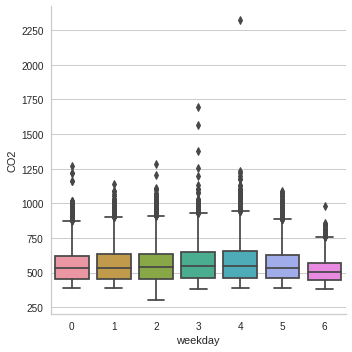

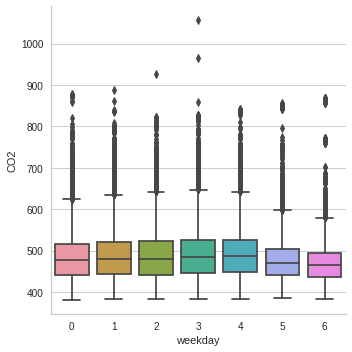

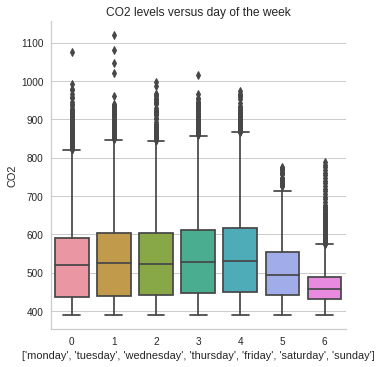

In [26]:
sns.catplot(x="weekday", y="CO2", kind="box", data=df_chatelet)
sns.catplot(x="weekday", y="CO2", kind="box", data=df_roosevelt)
sns.catplot(x="weekday", y="CO2", kind="box", data=df_auber)
plt.title('CO2 levels versus day of the week')
plt.xlabel(["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"])

Text(0.5, 6.79999999999999, "['jan', 'feb', 'march', 'apr', 'my', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec']")

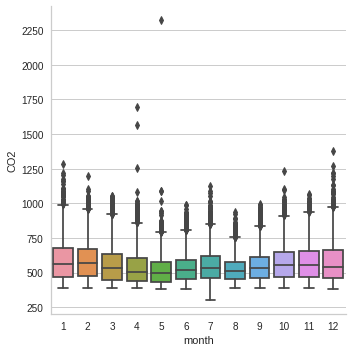

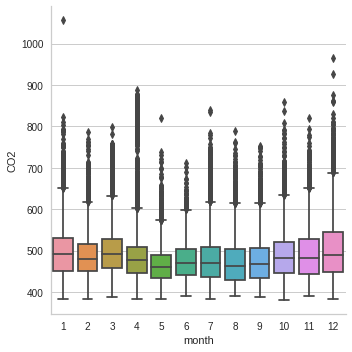

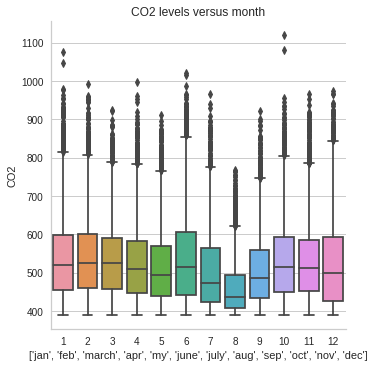

In [27]:
sns.catplot(x="month", y="CO2", kind="box", data=df_chatelet)
sns.catplot(x="month", y="CO2", kind="box", data=df_roosevelt)
sns.catplot(x="month", y="CO2", kind="box", data=df_auber)
plt.title('CO2 levels versus month')
plt.xlabel(["jan", "feb", "march", "apr", "my", "june", "july", "aug", "sep", "oct", "nov", "dec"])

### For Q1

In [28]:
X_train_chatelet, X_test_chatelet, y_train_chatelet, y_test_chatelet = train_test_split(df_chatelet[["CO2","hour",  "TEMP", "HUMI"]], df_chatelet["CO2"], test_size=0.20, random_state=33)

In [29]:
chatelet_AR = LinearRegression()
chatelet_AR.fit(X_train_chatelet, y_train_chatelet);

In [30]:
chatelet_AR_predicted = chatelet_AR.predict(X_test_chatelet)

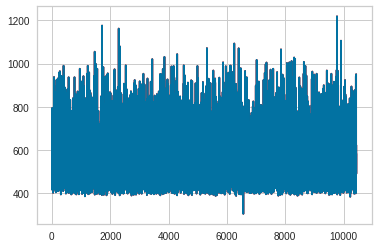

In [31]:
# In this graph its really difficult to see the error but I will leave it anyway, but let's not use it in the slides.
x_axis = [i+1 for i in range(X_test_chatelet.shape[0])]
plt.plot(x_axis, y_test_chatelet, label = "expected", color='red')
plt.plot(x_axis, chatelet_AR_predicted, label = "predicted");

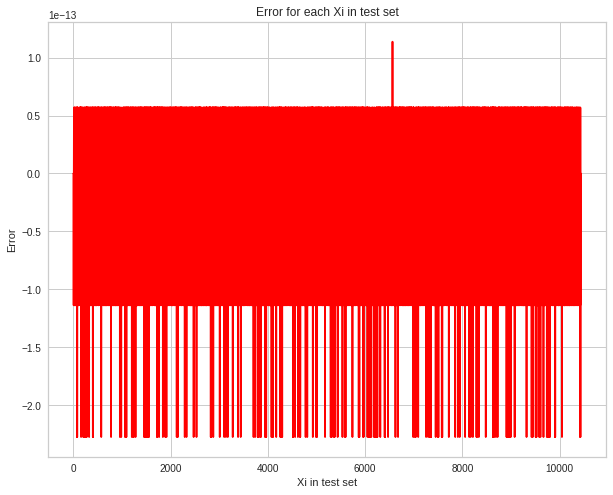

4.2017033223414284e-27

In [32]:
fig = plt.figure(figsize=(10,8))
x_axis = [i+1 for i in range(X_test_chatelet.shape[0])]
plt.plot(x_axis, y_test_chatelet - chatelet_AR_predicted, color='red')
plt.xlabel('Xi in test set')
plt.ylabel("Error")
plt.title("Error for each Xi in test set")
plt.show()
mean_squared_error(y_test_chatelet, chatelet_AR_predicted)
#Something might be wrong with this graph, the error is too small, it should be higher I think

# Q1

In [33]:
from sklearn import linear_model
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

In [34]:
columnss_chatelet = ["CO2", "NO", "NO2", "PM10", "TEMP", "HUMI", "hour", "weekday", "month"]
columnss_roosevelt = ["CO2", "NO", "NO2", "PM10", "TEMP", "HUMI", "hour", "weekday", "month"]
columnss_auber = ["CO2", "NO", "NO2", "PM10", "PM2.5", "TEMP", "HUMI", "hour", "weekday", "month"]

In [35]:
df_station = df_chatelet[columnss_chatelet][25000:]  # from 25000 because null values for chatlet
#df_station = df_auber[columnss_roosevelt]  # from 25000 because null values for chatlet
#df_station = df_roosevelt[columnss_auber]  # from 25000 because null values for chatlet
columnss = columnss_chatelet
df_station

,CO2,NO,NO2,PM10,TEMP,HUMI,hour,weekday,month
36364,610.0,11,41.0,90.0,26.0,51.454545,21,2,8
36363,518.0,18,45.0,80.0,25.8,52.363636,22,2,8
36362,533.0,42,53.0,68.0,25.6,53.272727,23,2,8
36361,516.0,17,34.0,71.0,25.4,54.181818,0,3,8
36360,469.0,12,31.0,64.0,25.2,55.090909,1,3,8
...,...,...,...,...,...,...,...,...,...
4,567.0,3,20.0,79.0,20.0,42.000000,22,6,10
3,518.0,4,20.0,62.0,20.0,42.000000,23,6,10
2,497.0,4,23.0,47.0,20.0,42.000000,0,0,10
1,474.0,4,21.0,37.0,20.0,42.000000,1,0,10


In [36]:
window = 50

# create a dataframe based in the copy of df_station_
df_station_1 = df_station.copy()

#change the number of rows to match the 
df_station_1 = df_station_1[0:len(df_station_1)-window].reset_index(drop=True)

for cols in columnss:
  for delay in range(0,window):
    df_station_1[cols+'-'+str(delay)] = df_station[[cols]][window-delay:len(df_station_1)+(window-delay)].reset_index(drop=True)
    df_station_1[cols+'-'+str(delay)]

df_station_1

,CO2,NO,NO2,PM10,TEMP,HUMI,hour,weekday,month,CO2-0,CO2-1,CO2-2,CO2-3,CO2-4,CO2-5,CO2-6,CO2-7,CO2-8,CO2-9,CO2-10,CO2-11,CO2-12,CO2-13,CO2-14,CO2-15,CO2-16,CO2-17,CO2-18,CO2-19,CO2-20,CO2-21,CO2-22,CO2-23,CO2-24,CO2-25,CO2-26,CO2-27,CO2-28,CO2-29,CO2-30,...,month-10,month-11,month-12,month-13,month-14,month-15,month-16,month-17,month-18,month-19,month-20,month-21,month-22,month-23,month-24,month-25,month-26,month-27,month-28,month-29,month-30,month-31,month-32,month-33,month-34,month-35,month-36,month-37,month-38,month-39,month-40,month-41,month-42,month-43,month-44,month-45,month-46,month-47,month-48,month-49
0,610.0,11,41.0,90.0,26.000000,51.454545,21,2,8,439.0,467.0,497.0,500.0,525.0,575.0,615.0,675.0,686.0,639.0,631.0,599.0,579.0,533.0,536.0,577.0,537.0,492.0,452.0,413.0,398.0,404.0,404.0,452.0,484.0,494.0,497.0,582.0,644.0,822.0,656.0,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
1,518.0,18,45.0,80.0,25.800000,52.363636,22,2,8,406.0,439.0,467.0,497.0,500.0,525.0,575.0,615.0,675.0,686.0,639.0,631.0,599.0,579.0,533.0,536.0,577.0,537.0,492.0,452.0,413.0,398.0,404.0,404.0,452.0,484.0,494.0,497.0,582.0,644.0,822.0,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2,533.0,42,53.0,68.0,25.600000,53.272727,23,2,8,403.0,406.0,439.0,467.0,497.0,500.0,525.0,575.0,615.0,675.0,686.0,639.0,631.0,599.0,579.0,533.0,536.0,577.0,537.0,492.0,452.0,413.0,398.0,404.0,404.0,452.0,484.0,494.0,497.0,582.0,644.0,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,516.0,17,34.0,71.0,25.400000,54.181818,0,3,8,404.0,403.0,406.0,439.0,467.0,497.0,500.0,525.0,575.0,615.0,675.0,686.0,639.0,631.0,599.0,579.0,533.0,536.0,577.0,537.0,492.0,452.0,413.0,398.0,404.0,404.0,452.0,484.0,494.0,497.0,582.0,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
4,469.0,12,31.0,64.0,25.200000,55.090909,1,3,8,419.0,404.0,403.0,406.0,439.0,467.0,497.0,500.0,525.0,575.0,615.0,675.0,686.0,639.0,631.0,599.0,579.0,533.0,536.0,577.0,537.0,492.0,452.0,413.0,398.0,404.0,404.0,452.0,484.0,494.0,497.0,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27111,807.0,5,25.0,104.0,20.454545,45.684211,20,4,10,567.0,602.0,599.0,582.0,554.0,562.0,536.0,519.0,471.0,471.0,464.0,458.0,455.0,452.0,449.0,452.0,457.0,464.0,519.0,523.0,524.0,519.0,556.0,610.0,680.0,656.0,680.0,642.0,642.0,575.0,569.0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
27112,672.0,5,30.0,97.0,20.500000,45.877193,21,4,10,518.0,567.0,602.0,599.0,582.0,554.0,562.0,536.0,519.0,471.0,471.0,464.0,458.0,455.0,452.0,449.0,452.0,457.0,464.0,519.0,523.0,524.0,519.0,556.0,610.0,680.0,656.0,680.0,642.0,642.0,575.0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
27113,753.0,6,28.0,110.0,20.545455,46.070175,22,4,10,497.0,518.0,567.0,602.0,599.0,582.0,554.0,562.0,536.0,519.0,471.0,471.0,464.0,458.0,455.0,452.0,449.0,452.0,457.0,464.0,519.0,523.0,524.0,519.0,556.0,610.0,680.0,656.0,680.0,642.0,642.0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
27114,614.0,8,46.0,107.0,20.590909,46.263158,23,4,10,474.0,497.0,518.0,567.0,602.0,599.0,582.0,554.0,562.0,536.0,519.0,471.0,471.0,464.0,458.0,455.0,452.0,449.0,452.0,457.0,464.0,519.0,523.0,524.0,519.0,556.0,610.0,680.0,656.0,680.0,642.0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [37]:
# deleting columns that are replicated in CO2-0, TEMP-0, hour-0, weekday-0, month-0
df_station_1 = df_station_1.drop(columnss, 1)
df_station_1

,CO2-0,CO2-1,CO2-2,CO2-3,CO2-4,CO2-5,CO2-6,CO2-7,CO2-8,CO2-9,CO2-10,CO2-11,CO2-12,CO2-13,CO2-14,CO2-15,CO2-16,CO2-17,CO2-18,CO2-19,CO2-20,CO2-21,CO2-22,CO2-23,CO2-24,CO2-25,CO2-26,CO2-27,CO2-28,CO2-29,CO2-30,CO2-31,CO2-32,CO2-33,CO2-34,CO2-35,CO2-36,CO2-37,CO2-38,CO2-39,...,month-10,month-11,month-12,month-13,month-14,month-15,month-16,month-17,month-18,month-19,month-20,month-21,month-22,month-23,month-24,month-25,month-26,month-27,month-28,month-29,month-30,month-31,month-32,month-33,month-34,month-35,month-36,month-37,month-38,month-39,month-40,month-41,month-42,month-43,month-44,month-45,month-46,month-47,month-48,month-49
0,439.0,467.0,497.0,500.0,525.0,575.0,615.0,675.0,686.0,639.0,631.0,599.0,579.0,533.0,536.0,577.0,537.0,492.0,452.0,413.0,398.0,404.0,404.0,452.0,484.0,494.0,497.0,582.0,644.0,822.0,656.0,633.0,635.0,586.0,559.0,562.0,551.0,556.0,559.0,559.0,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
1,406.0,439.0,467.0,497.0,500.0,525.0,575.0,615.0,675.0,686.0,639.0,631.0,599.0,579.0,533.0,536.0,577.0,537.0,492.0,452.0,413.0,398.0,404.0,404.0,452.0,484.0,494.0,497.0,582.0,644.0,822.0,656.0,633.0,635.0,586.0,559.0,562.0,551.0,556.0,559.0,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2,403.0,406.0,439.0,467.0,497.0,500.0,525.0,575.0,615.0,675.0,686.0,639.0,631.0,599.0,579.0,533.0,536.0,577.0,537.0,492.0,452.0,413.0,398.0,404.0,404.0,452.0,484.0,494.0,497.0,582.0,644.0,822.0,656.0,633.0,635.0,586.0,559.0,562.0,551.0,556.0,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,404.0,403.0,406.0,439.0,467.0,497.0,500.0,525.0,575.0,615.0,675.0,686.0,639.0,631.0,599.0,579.0,533.0,536.0,577.0,537.0,492.0,452.0,413.0,398.0,404.0,404.0,452.0,484.0,494.0,497.0,582.0,644.0,822.0,656.0,633.0,635.0,586.0,559.0,562.0,551.0,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
4,419.0,404.0,403.0,406.0,439.0,467.0,497.0,500.0,525.0,575.0,615.0,675.0,686.0,639.0,631.0,599.0,579.0,533.0,536.0,577.0,537.0,492.0,452.0,413.0,398.0,404.0,404.0,452.0,484.0,494.0,497.0,582.0,644.0,822.0,656.0,633.0,635.0,586.0,559.0,562.0,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27111,567.0,602.0,599.0,582.0,554.0,562.0,536.0,519.0,471.0,471.0,464.0,458.0,455.0,452.0,449.0,452.0,457.0,464.0,519.0,523.0,524.0,519.0,556.0,610.0,680.0,656.0,680.0,642.0,642.0,575.0,569.0,588.0,547.0,527.0,520.0,478.0,469.0,465.0,452.0,438.0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
27112,518.0,567.0,602.0,599.0,582.0,554.0,562.0,536.0,519.0,471.0,471.0,464.0,458.0,455.0,452.0,449.0,452.0,457.0,464.0,519.0,523.0,524.0,519.0,556.0,610.0,680.0,656.0,680.0,642.0,642.0,575.0,569.0,588.0,547.0,527.0,520.0,478.0,469.0,465.0,452.0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
27113,497.0,518.0,567.0,602.0,599.0,582.0,554.0,562.0,536.0,519.0,471.0,471.0,464.0,458.0,455.0,452.0,449.0,452.0,457.0,464.0,519.0,523.0,524.0,519.0,556.0,610.0,680.0,656.0,680.0,642.0,642.0,575.0,569.0,588.0,547.0,527.0,520.0,478.0,469.0,465.0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
27114,474.0,497.0,518.0,567.0,602.0,599.0,582.0,554.0,562.0,536.0,519.0,471.0,471.0,464.0,458.0,455.0,452.0,449.0,452.0,457.0,464.0,519.0,523.0,524.0,519.0,556.0,610.0,680.0,656.0,680.0,642.0,642.0,575.0,569.0,588.0,547.0,527.0,520.0,478.0,469.0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10

In [38]:
x = df_station_1.drop('CO2-0', 1)
y = df_station_1['CO2-0']

In [39]:
#using linear least squares with l2 regularization
model = Ridge(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Average MAE: %.3f, STD MAE: %.3f' % (mean(scores), std(scores)))

Average MAE: 17.541, STD MAE: 0.366


In [40]:
#show predictions

x_train = df_station_1.drop('CO2-0', 1)[0:20000]
y_train = df_station_1['CO2-0'][0:20000]
x_test = df_station_1.drop('CO2-0', 1)[20000:]
y_test = df_station_1['CO2-0'][20000:]
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

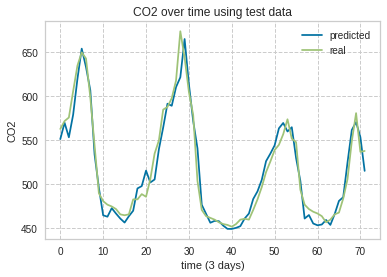

In [41]:
plt.plot(y_pred[0:24*3], label="predicted")
plt.plot(y_test[0:24*3].reset_index(drop=True), label="real")
plt.title('CO2 over time using test data')
plt.xlabel('time (3 days)')
plt.ylabel('CO2')
plt.legend(loc="upper right")
plt.grid(linestyle = '--')
plt.show()

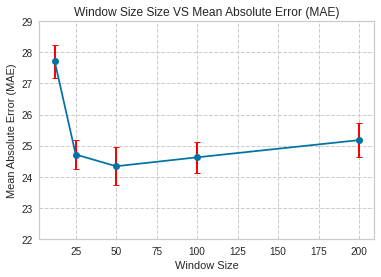

In [42]:
avgs = [27.720, 24.713, 24.336, 24.623, 25.177]
stds = [0.534, 0.476, 0.606, 0.501, 0.539]

avgs1 = [26.203, 23.962, 23.688, 24.152, 24.975]
stds1 = [0.545, 0.481, 0.561, 0.435, 0.545]

winds = [12, 25, 50, 100, 200]

plt.ylim(22, 29)

plt.errorbar(winds, avgs, stds, fmt='-o', ecolor = 'red', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1)

plt.title("Window Size Size VS Mean Absolute Error (MAE)")
plt.xlabel("Window Size")
plt.ylabel("Mean Absolute Error (MAE)")

plt.grid(linestyle = '--')
plt.show()

# For Q4

In [43]:
left = df_chatelet.copy()
duplicates = ['hour', 'weekday', 'month']
left.drop(duplicates, axis=1, inplace=True)

right = df_auber.copy()

df_all_stations = pd.merge(left, right, how='inner', on='DATE/HEURE', suffixes=('_chat', '_aub'))

df_all_stations.head(5)

,DATE/HEURE,NO_chat,NO2_chat,PM10_chat,CO2_chat,TEMP_chat,HUMI_chat,weekend_chat,summer_chat,NO_aub,NO2_aub,PM10_aub,PM2.5,CO2_aub,TEMP_aub,HUMI_aub,hour,weekday,month,weekend_aub,summer_aub
0,2013-01-04 17:00:00,21,43.0,141.0,758.0,21.692308,44.285714,0,0,101.0,30.0,436.0,184.0,696.0,22.00,49.0,17,4,1,0,0
1,2013-01-04 18:00:00,25,44.0,136.0,865.0,21.846154,44.000000,0,0,113.0,49.0,388.0,154.0,759.0,22.00,49.0,18,4,1,0,0
2,2013-01-04 19:00:00,31,47.0,137.0,833.0,22.000000,44.066667,0,0,126.0,48.0,392.0,141.0,830.0,22.00,49.0,19,4,1,0,0
3,2013-01-04 20:00:00,48,49.0,123.0,797.0,21.833333,44.133333,0,0,102.0,41.0,692.0,286.0,757.0,21.95,49.0,20,4,1,0,0
4,2013-01-04 21:00:00,33,51.0,101.0,695.0,21.666667,44.200000,0,0,92.0,42.0,584.0,244.0,646.0,21.90,49.0,21,4,1,0,0


In [44]:
y_roosevelt = df_roosevelt[['DATE/HEURE','CO2']].copy()

df_all_stations = pd.merge(df_all_stations, y_roosevelt, how='inner', on='DATE/HEURE')

df_all_stations.sort_values(by=['DATE/HEURE']).tail(10)

,DATE/HEURE,NO_chat,NO2_chat,PM10_chat,CO2_chat,TEMP_chat,HUMI_chat,weekend_chat,summer_chat,NO_aub,NO2_aub,PM10_aub,PM2.5,CO2_aub,TEMP_aub,HUMI_aub,hour,weekday,month,weekend_aub,summer_aub,CO2
23763,2017-11-23 23:00:00,29,42.0,68.0,528.0,19.000000,69.875000,0,0,42.0,49.0,78.0,24.0,430.000000,19.0,53.750000,23,3,11,0,0,497.0
23764,2017-11-24 00:00:00,33,42.0,63.0,502.0,18.800000,70.250000,0,0,40.0,45.0,99.0,22.0,423.000000,19.0,54.000000,0,4,11,0,0,496.0
23765,2017-11-24 01:00:00,19,38.0,60.0,455.0,18.600000,70.625000,0,0,26.0,39.0,182.0,30.0,401.000000,19.0,54.250000,1,4,11,0,0,450.0
23766,2017-11-24 02:00:00,6,29.0,40.0,392.0,18.400000,71.000000,0,0,34.0,40.0,142.0,40.0,405.285714,19.0,54.500000,2,4,11,0,0,408.0
23767,2017-11-24 06:00:00,6,21.0,20.0,397.0,18.200000,69.714286,0,0,30.0,25.0,19.0,14.0,422.428571,19.0,53.769231,6,4,11,0,0,414.0
23768,2017-11-24 07:00:00,10,27.0,67.0,428.0,18.000000,68.428571,0,0,10.0,26.0,81.0,40.0,426.714286,19.0,53.153846,7,4,11,0,0,437.0
23769,2017-11-24 08:00:00,30,41.0,85.0,510.0,17.944444,67.142857,0,0,31.0,40.0,72.0,33.0,431.000000,19.0,52.538462,8,4,11,0,0,471.0
23770,2017-11-24 09:00:00,54,53.0,102.0,648.0,17.888889,65.857143,0,0,61.0,49.0,92.0,30.0,549.000000,19.0,51.923077,9,4,11,0,0,574.0
23771,2017-11-24 10:00:00,42,41.0,128.0,726.0,17.833333,64.571429,0,0,88.0,45.0,149.0,63.0,642.000000,19.0,51.307692,10,4,11,0,0,642.0
23772,2017-11-24 11:00:00,42,50.0,88.0,610.0,17.777778,63.285714,0,0,99.0,58.0,126.0,25.0,482.000000,19.0,50.692308,11,4,11,0,0,527.0


In [45]:
df_all_stations_clean = df_all_stations.dropna(axis=0, how='any').copy()
df_all_stations_clean.drop('DATE/HEURE', axis=1, inplace=True)
len(df_all_stations_clean)

23773

Text(0.5, 1.0, 'Boxplots before standard scaling')

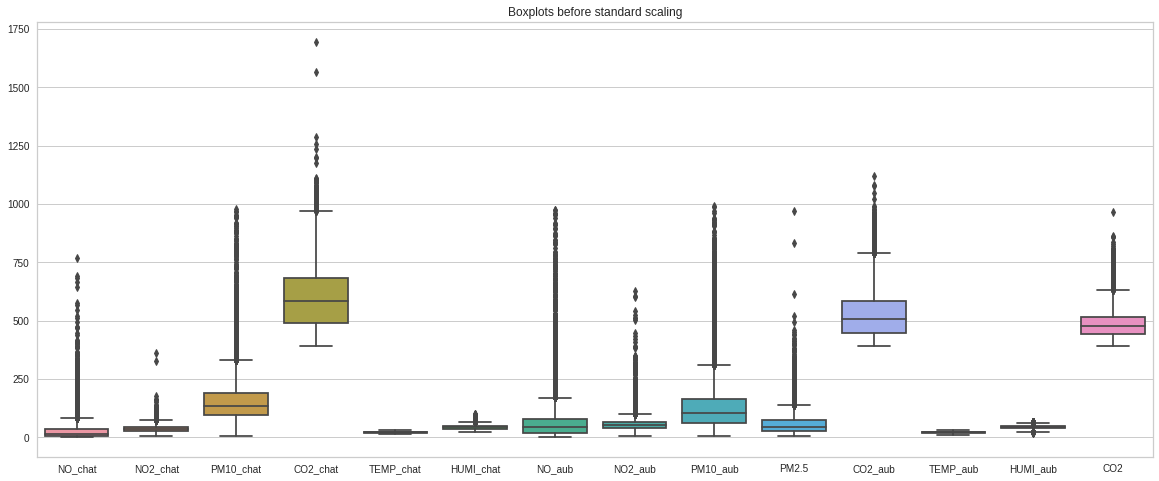

In [46]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df_all_stations_clean[['NO_chat', 'NO2_chat', 'PM10_chat', 'CO2_chat', 'TEMP_chat', 'HUMI_chat', 'NO_aub', 'NO2_aub', 'PM10_aub', 'PM2.5', 'CO2_aub', 'TEMP_aub', 'HUMI_aub', 'CO2']])
plt.title('Boxplots before standard scaling')

In [47]:
from sklearn.preprocessing import StandardScaler
cols_to_scale = ['NO_chat', 'NO2_chat', 'PM10_chat', 'CO2_chat', 'TEMP_chat', 'HUMI_chat', 'weekend_chat', 'summer_chat', 'NO_aub', 'NO2_aub', 'PM10_aub', 'PM2.5', 'CO2_aub', 'TEMP_aub', 'HUMI_aub', 'weekend_aub', 'summer_aub', 'CO2']

scaler = StandardScaler()
scaler.fit(df_all_stations_clean[cols_to_scale])

df_scaled = pd.DataFrame(data=scaler.transform(df_all_stations_clean[cols_to_scale]), columns=cols_to_scale)
df_scaled.head(5)

,NO_chat,NO2_chat,PM10_chat,CO2_chat,TEMP_chat,HUMI_chat,weekend_chat,summer_chat,NO_aub,NO2_aub,PM10_aub,PM2.5,CO2_aub,TEMP_aub,HUMI_aub,weekend_aub,summer_aub,CO2
0,-0.241040,0.412697,-0.117414,1.201855,-0.093942,0.042385,-0.64314,-0.553361,0.538731,-1.029173,2.643923,2.625121,1.591366,0.162663,0.728169,-0.64314,-0.553361,2.192636
1,-0.137288,0.479617,-0.170710,2.006025,-0.050314,0.008710,-0.64314,-0.553361,0.702502,-0.269156,2.224416,1.997258,2.194492,0.162663,0.728169,-0.64314,-0.553361,3.116244
2,0.018341,0.680378,-0.160051,1.765526,-0.006686,0.016567,-0.64314,-0.553361,0.879921,-0.309157,2.259375,1.725184,2.874205,0.162663,0.728169,-0.64314,-0.553361,2.921800
3,0.459288,0.814219,-0.309282,1.494964,-0.053949,0.024425,-0.64314,-0.553361,0.552379,-0.589163,4.881293,4.759855,2.175345,0.149154,0.728169,-0.64314,-0.553361,2.354673
4,0.070217,0.948059,-0.543787,0.728372,-0.101213,0.032282,-0.64314,-0.553361,0.415902,-0.549162,3.937403,3.880847,1.112695,0.135644,0.728169,-0.64314,-0.553361,1.382453


Text(0.5, 1.0, 'Boxplots after standard scaling')

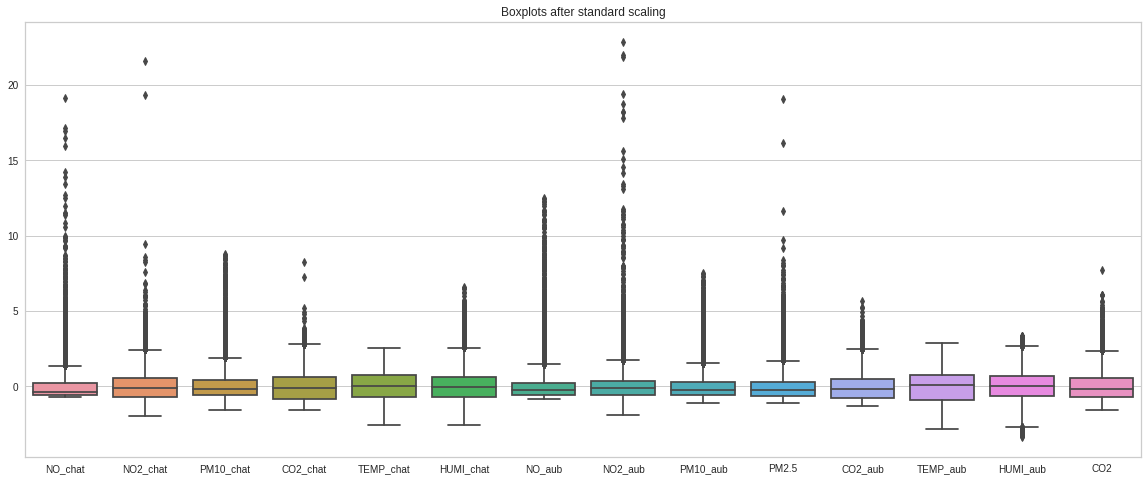

In [48]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df_scaled[['NO_chat', 'NO2_chat', 'PM10_chat', 'CO2_chat', 'TEMP_chat', 'HUMI_chat', 'NO_aub', 'NO2_aub', 'PM10_aub', 'PM2.5', 'CO2_aub', 'TEMP_aub', 'HUMI_aub', 'CO2']])
plt.title('Boxplots after standard scaling')

In [49]:
X = df_scaled.drop('CO2', axis=1).copy()
y = df_scaled['CO2'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [50]:
lr_all_stations_full = LinearRegression()  
lr_all_stations_full.fit(X_train, y_train)

y_pred = lr_all_stations_full.predict(X_test)

In [51]:
import plotly.express as px

fig = px.bar(
    x=X.columns, y=lr_all_stations_full.coef_,
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting CO2 in F.R. station'
)

fig.show()

In [52]:
def linreg_model(df, dep='CO2'):
    y = df[dep].copy()
    X = df.drop(dep, axis=1).copy()

    scaler = StandardScaler()
    scaler.fit(X)

    X_scld = pd.DataFrame(data=scaler.transform(X), columns=X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X_scld, y, test_size=0.3, random_state=101)

    lr_all_stations_cont = LinearRegression()  
    lr_all_stations_cont.fit(X_train, y_train)

    y_pred = lr_all_stations_cont.predict(X_test)

    fig1 = px.bar(
        x=X_scld.columns, y=lr_all_stations_cont.coef_,
        labels=dict(x='Feature', y='Linear coefficient'),
        title='Weight of each feature for predicting CO2 at F.D. Roosevelt station'
    )
  

    # Evaluate the prediction accuracy of the model
    print("The Explained Variance: %.2f" % lr_all_stations_cont.score(X_test, y_test))
    print("The Mean Absolute Error: %.2f " % mean_absolute_error(y_test, y_pred))
    print("The Median Absolute Error: %.2f " % median_absolute_error(y_test, y_pred))

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    intercept = lr_all_stations_cont.intercept_

    print("Mean squared error: %.2f" %mse)
    print("Root mean squared error: %.2f" %math.sqrt(mse))
    print("R2 Score: %.2f" %r2)
    print("Intercept: %.2f" %intercept)

    fig2 = plt.figure()
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df1 = df.head(25)
    df1.plot(kind='bar',figsize=(12,6))
    plt.title('Predicted versus actual values')
    plt.ylabel('CO2 level')
    plt.ylabel('Observations')
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  
    fig1.show()
    fig2.show()

The Explained Variance: 0.53
The Mean Absolute Error: 0.51 
The Median Absolute Error: 0.39 
Mean squared error: 0.47
Root mean squared error: 0.68
R2 Score: 0.53
Intercept: -0.00


<Figure size 432x288 with 0 Axes>

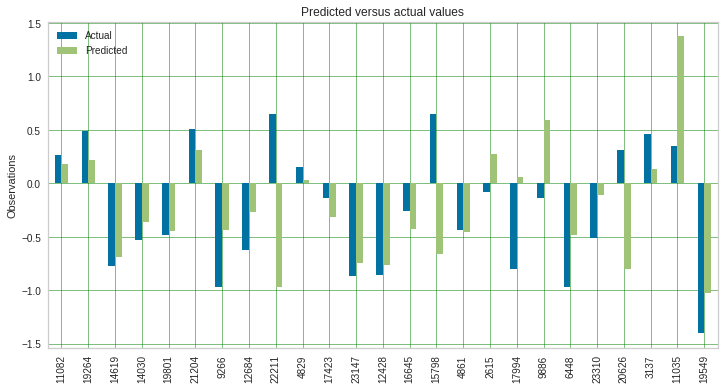

In [53]:
linreg_model(df_scaled, 'CO2')

# Ridge regularization

The Explained Variance: 0.54
The Mean Absolute Error: 0.50 
The Median Absolute Error: 0.40 
Mean squared error: 0.44
Root mean squared error: 0.67
R2 Score: 0.54
Intercept: 0.004001
Linear coefficients: [ 0.05176013  0.10981815 -0.05594485  0.36025382 -0.2134806   0.03648345
 -0.00410898  0.03135489  0.03627829  0.07814626 -0.0174154  -0.10494317
  0.35198075  0.05865945  0.04157739 -0.00410898  0.03135489]


<Figure size 432x288 with 0 Axes>

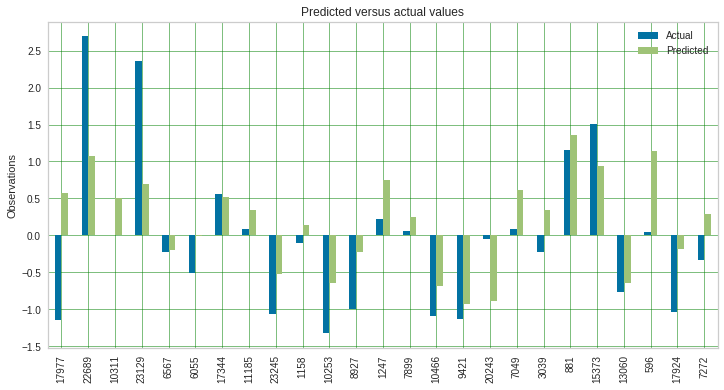

In [54]:
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("The Explained Variance: %.2f" % reg.score(X_test, y_test))
print("The Mean Absolute Error: %.2f " % mean_absolute_error(y_test, y_pred))
print("The Median Absolute Error: %.2f " % median_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
intercept = reg.intercept_

print("Mean squared error: %.2f" %mse)
print("Root mean squared error: %.2f" %math.sqrt(mse))
print("R2 Score: %.2f" %r2)
print("Intercept: %.6f" %intercept)


print('Linear coefficients:', reg.coef_)

fig1 = px.bar(
    x=X.columns, y=reg.coef_,
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting CO2 in F.R. station'
)

fig1.update_layout(
    autosize=False,
    width=1000,
    height=500,
)

fig2 = plt.figure()
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,6))
plt.title('Predicted versus actual values')
plt.ylabel('CO2 level')
plt.ylabel('Observations')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig1.show()
fig2.show()

The Explained Variance: 0.21
The Mean Absolute Error: 0.67 
The Median Absolute Error: 0.54 
Mean squared error: 0.77
Root mean squared error: 0.88
R2 Score: 0.21
Intercept: 0.004434
Linear coefficients: [ 0.          0.          0.          0.11082027 -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.06844726 -0.          0.         -0.         -0.        ]


<Figure size 432x288 with 0 Axes>

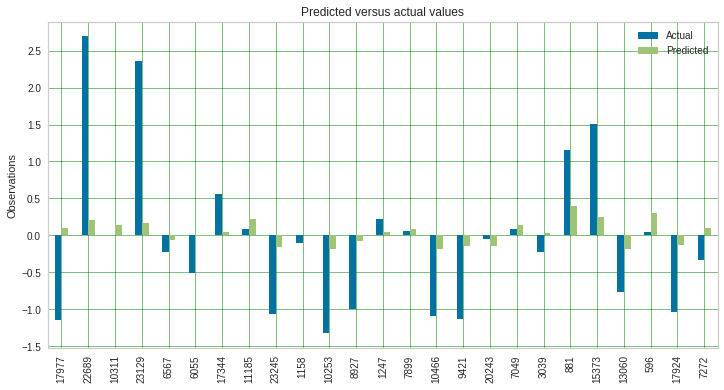

In [55]:
reg = linear_model.Lasso(alpha=.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("The Explained Variance: %.2f" % reg.score(X_test, y_test))
print("The Mean Absolute Error: %.2f " % mean_absolute_error(y_test, y_pred))
print("The Median Absolute Error: %.2f " % median_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
intercept = reg.intercept_

print("Mean squared error: %.2f" %mse)
print("Root mean squared error: %.2f" %math.sqrt(mse))
print("R2 Score: %.2f" %r2)
print("Intercept: %.6f" %intercept)


print('Linear coefficients:', reg.coef_)

fig1 = px.bar(
    x=X.columns, y=reg.coef_,
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting CO2 in F.R. station'
)

fig1.update_layout(
    autosize=False,
    width=1000,
    height=500,
)

fig2 = plt.figure()
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,6))
plt.title('Predicted versus actual values')
plt.ylabel('CO2 level')
plt.ylabel('Observations')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig1.show()
fig2.show()

# Increasing the number of features

In [56]:
df_all_stations_clean = df_all_stations_clean.drop(columns=['weekend_aub', 'summer_aub']).rename(columns={'weekend_chat':'weekend', 'summer_chat': 'summer'})

In [57]:
cols_dummify = ['hour','weekday', 'month', 'weekend','summer']

dep = pd.DataFrame(data=df_all_stations_clean.CO2.values.reshape(-1,1), columns=["CO2"])
temp = df_all_stations_clean.drop('CO2', axis=1).copy()

df_dc = pd.get_dummies(temp, columns=cols_dummify, drop_first=True)

scaler = StandardScaler().fit(df_dc)

indep = pd.DataFrame(data=scaler.transform(df_dc), columns=df_dc.columns)
print(indep.shape)
print(dep.shape)

(23773, 55)
(23773, 1)


In [58]:
pd_all_stations_clean_scld = pd.concat([indep,dep], axis=1)
print(pd_all_stations_clean_scld.shape)

(23773, 56)


In [59]:
pd_all_stations_clean_scld.head(3)

,NO_chat,NO2_chat,PM10_chat,CO2_chat,TEMP_chat,HUMI_chat,NO_aub,NO2_aub,PM10_aub,PM2.5,CO2_aub,TEMP_aub,HUMI_aub,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekend_1,summer_1,CO2
0,-0.241040,0.412697,-0.117414,1.201855,-0.093942,0.042385,0.538731,-1.029173,2.643923,2.625121,1.591366,0.162663,0.728169,-0.212595,-0.203349,-0.182836,-0.181727,-0.183816,-0.194784,-0.211404,-0.213351,-0.212919,-0.214319,-0.213135,-0.210534,-0.212271,-0.210425,-0.210097,-0.210097,4.658951,-0.214104,-0.213889,-0.215497,-0.216989,-0.215817,-0.214855,-0.410899,-0.404162,-0.405781,2.528715,-0.41425,-0.413692,-0.298673,-0.278661,-0.323643,-0.268176,-0.279361,-0.297167,-0.296663,-0.324039,-0.352465,-0.33471,-0.216776,-0.64314,-0.553361,621.0
1,-0.137288,0.479617,-0.170710,2.006025,-0.050314,0.008710,0.702502,-0.269156,2.224416,1.997258,2.194492,0.162663,0.728169,-0.212595,-0.203349,-0.182836,-0.181727,-0.183816,-0.194784,-0.211404,-0.213351,-0.212919,-0.214319,-0.213135,-0.210534,-0.212271,-0.210425,-0.210097,-0.210097,-0.214641,4.670629,-0.213889,-0.215497,-0.216989,-0.215817,-0.214855,-0.410899,-0.404162,-0.405781,2.528715,-0.41425,-0.413692,-0.298673,-0.278661,-0.323643,-0.268176,-0.279361,-0.297167,-0.296663,-0.324039,-0.352465,-0.33471,-0.216776,-0.64314,-0.553361,678.0
2,0.018341,0.680378,-0.160051,1.765526,-0.006686,0.016567,0.879921,-0.309157,2.259375,1.725184,2.874205,0.162663,0.728169,-0.212595,-0.203349,-0.182836,-0.181727,-0.183816,-0.194784,-0.211404,-0.213351,-0.212919,-0.214319,-0.213135,-0.210534,-0.212271,-0.210425,-0.210097,-0.210097,-0.214641,-0.214104,4.675324,-0.215497,-0.216989,-0.215817,-0.214855,-0.410899,-0.404162,-0.405781,2.528715,-0.41425,-0.413692,-0.298673,-0.278661,-0.323643,-0.268176,-0.279361,-0.297167,-0.296663,-0.324039,-0.352465,-0.33471,-0.216776,-0.64314,-0.553361,666.0


The Explained Variance: 0.57
The Mean Absolute Error: 30.26 
The Median Absolute Error: 23.41 
Mean squared error: 1647.12
Root mean squared error: 40.58
R2 Score: 0.57
Intercept: 485.57


<Figure size 432x288 with 0 Axes>

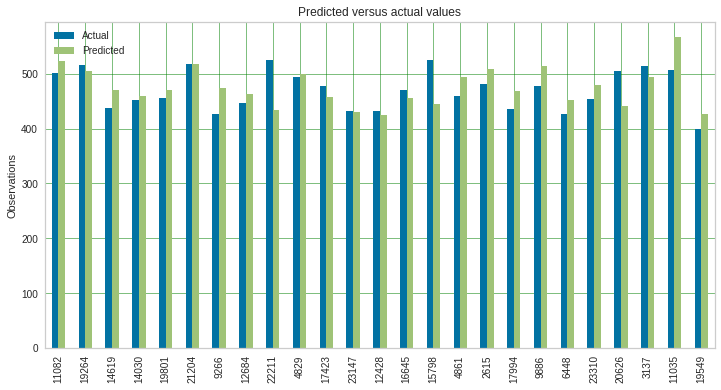

In [60]:
linreg_model(pd_all_stations_clean_scld, 'CO2')

In [61]:
X = pd_all_stations_clean_scld.drop('CO2', axis=1).copy()
y = pd_all_stations_clean_scld['CO2'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

The Explained Variance: 0.57
The Mean Absolute Error: 30.31 
The Median Absolute Error: 23.39 
Mean squared error: 1643.08
Root mean squared error: 40.53
R2 Score: 0.57
Intercept: 485.471055
Linear coefficients: [  2.13595055   7.20262358  -1.69467117  18.70381401 -10.38359452
   1.52946792   2.51677785   3.13228548  -1.30319942  -4.47109969
  18.44825575  -0.           2.94615612  -0.          -1.51688334
  -2.13222306  -2.03133516  -2.24174057  -1.34010536  -0.84226469
  -2.0370698    0.           2.99097903  -0.44803654  -1.90947213
  -0.58104127  -0.93984094   0.           0.           0.2790699
   1.44652391   3.54325987   3.18944233   0.           0.
   0.19603358  -0.           0.           0.           0.
  -1.99099996   0.32236183  -2.37962432  -1.99135301   1.8665579
   2.36466637   0.           0.41363905   0.           0.
   0.93963521   1.32006069   3.87343867  -0.           4.08022817]


<Figure size 432x288 with 0 Axes>

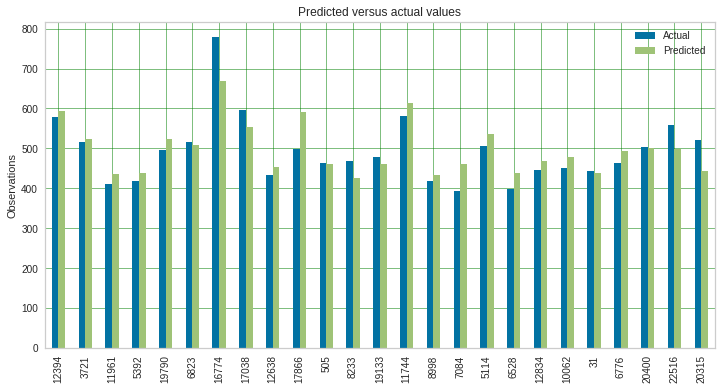

In [62]:
reg = linear_model.Lasso(alpha=.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("The Explained Variance: %.2f" % reg.score(X_test, y_test))
print("The Mean Absolute Error: %.2f " % mean_absolute_error(y_test, y_pred))
print("The Median Absolute Error: %.2f " % median_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
intercept = reg.intercept_

print("Mean squared error: %.2f" %mse)
print("Root mean squared error: %.2f" %math.sqrt(mse))
print("R2 Score: %.2f" %r2)
print("Intercept: %.6f" %intercept)


print('Linear coefficients:', reg.coef_)

fig1 = px.bar(
    x=X.columns, y=reg.coef_,
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting CO2 in F.R. station'
)

fig1.update_layout(
    autosize=False,
    width=1000,
    height=500,
)

fig2 = plt.figure()
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,6))
plt.title('Predicted versus actual values')
plt.ylabel('CO2 level')
plt.ylabel('Observations')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig1.show()
fig2.show()

The Explained Variance: 0.57
The Mean Absolute Error: 30.13 
The Median Absolute Error: 23.86 
Mean squared error: 1614.13
Root mean squared error: 40.18
R2 Score: 0.57
Intercept: 485.452194
Linear coefficients: [  2.8634783    8.38911102  -2.0929471   16.21317577 -12.12971334
  -0.08636283   3.09403009   2.32245298  -2.17902336  -4.20055392
  18.36148365  -6.79544537   5.44937749  -1.50258682  -3.32536382
  -3.90455035  -3.87242328  -4.06055634  -3.28016027  -2.65752117
  -3.80561224  -0.82857833   2.64682583  -1.93462453  -3.32645758
  -1.79492197  -2.06770777  -0.27173711   0.12955943   0.63563359
   2.08945993   4.19478786   3.63783575  -0.04836862  -0.55455281
  -0.23011828   0.45670208   0.6780703    0.7193154    0.82691413
  -1.54470198   1.20161298  -0.57608132   0.35714245   7.08898727
   7.64946995   3.89442413   6.08526826   4.19770661   7.21813493
   7.62965973   5.74903339   6.14634498  -0.26752557   9.00617653]


<Figure size 432x288 with 0 Axes>

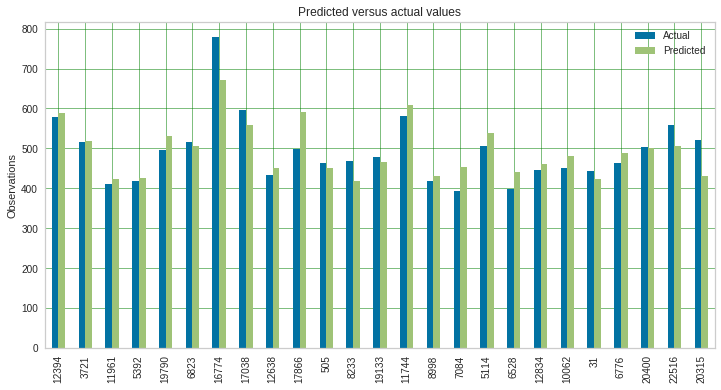

In [63]:
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("The Explained Variance: %.2f" % reg.score(X_test, y_test))
print("The Mean Absolute Error: %.2f " % mean_absolute_error(y_test, y_pred))
print("The Median Absolute Error: %.2f " % median_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
intercept = reg.intercept_

print("Mean squared error: %.2f" %mse)
print("Root mean squared error: %.2f" %math.sqrt(mse))
print("R2 Score: %.2f" %r2)
print("Intercept: %.6f" %intercept)


print('Linear coefficients:', reg.coef_)

fig1 = px.bar(
    x=X.columns, y=reg.coef_,
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting CO2 in F.R. station'
)

fig1.update_layout(
    autosize=False,
    width=1000,
    height=500,
)

fig2 = plt.figure()
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,6))
plt.title('Predicted versus actual values')
plt.ylabel('CO2 level')
plt.ylabel('Observations')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig1.show()
fig2.show()

In [64]:
from sklearn.linear_model import ElasticNet

The Explained Variance: 0.54
The Mean Absolute Error: 31.00 
The Median Absolute Error: 24.19 
Mean squared error: 1735.82
Root mean squared error: 41.66
R2 Score: 0.54
Intercept: 485.475662
Linear coefficients: [ 3.78925933e+00  5.06549264e+00 -0.00000000e+00  1.22185602e+01
 -3.79820382e+00  1.58072694e+00  2.81928710e+00  3.25308392e+00
 -0.00000000e+00 -7.10019256e-01  1.21600175e+01 -2.36103615e+00
  1.16773590e+00 -8.44486675e-01 -2.36097110e+00 -2.56907535e+00
 -2.40466580e+00 -2.52291837e+00 -1.77841171e+00 -1.62043616e+00
 -1.86596893e+00  1.68692591e-01  2.87757497e+00 -3.95063668e-01
 -1.39292539e+00 -1.15712988e-01 -1.35993539e-01  3.79911703e-01
  7.91740828e-01  1.44101507e+00  3.11237329e+00  5.05050828e+00
  4.16975102e+00  7.78203381e-01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.09441944e-02  1.66779448e-01
 -9.03838449e-01 -0.00000000e+00 -1.50912476e+00 -7.44777283e-01
  9.64081634e-01  5.19629263e-01  6.18956561e-04  1.52806716e-01
 -2.3092

<Figure size 432x288 with 0 Axes>

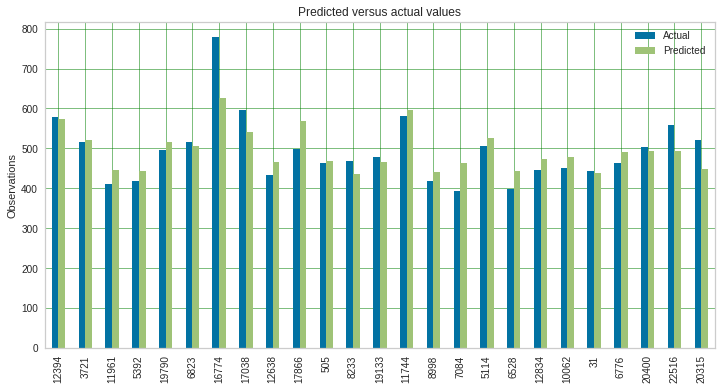

In [65]:
reg = linear_model.ElasticNet()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("The Explained Variance: %.2f" % reg.score(X_test, y_test))
print("The Mean Absolute Error: %.2f " % mean_absolute_error(y_test, y_pred))
print("The Median Absolute Error: %.2f " % median_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
intercept = reg.intercept_

print("Mean squared error: %.2f" %mse)
print("Root mean squared error: %.2f" %math.sqrt(mse))
print("R2 Score: %.2f" %r2)
print("Intercept: %.6f" %intercept)


print('Linear coefficients:', reg.coef_)

fig1 = px.bar(
    x=X.columns, y=reg.coef_,
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting CO2 in F.R. station'
)

fig1.update_layout(
    autosize=False,
    width=1000,
    height=500,
)

fig2 = plt.figure()
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,6))
plt.title('Predicted versus actual values')
plt.ylabel('CO2 level')
plt.ylabel('Observations')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig1.show()
fig2.show()

# Clustering

In [66]:
from sklearn.cluster import KMeans

In [67]:
df_all_stations

,DATE/HEURE,NO_chat,NO2_chat,PM10_chat,CO2_chat,TEMP_chat,HUMI_chat,weekend_chat,summer_chat,NO_aub,NO2_aub,PM10_aub,PM2.5,CO2_aub,TEMP_aub,HUMI_aub,hour,weekday,month,weekend_aub,summer_aub,CO2
0,2013-01-04 17:00:00,21,43.0,141.0,758.0,21.692308,44.285714,0,0,101.0,30.0,436.0,184.0,696.000000,22.00,49.000000,17,4,1,0,0,621.0
1,2013-01-04 18:00:00,25,44.0,136.0,865.0,21.846154,44.000000,0,0,113.0,49.0,388.0,154.0,759.000000,22.00,49.000000,18,4,1,0,0,678.0
2,2013-01-04 19:00:00,31,47.0,137.0,833.0,22.000000,44.066667,0,0,126.0,48.0,392.0,141.0,830.000000,22.00,49.000000,19,4,1,0,0,666.0
3,2013-01-04 20:00:00,48,49.0,123.0,797.0,21.833333,44.133333,0,0,102.0,41.0,692.0,286.0,757.000000,21.95,49.000000,20,4,1,0,0,631.0
4,2013-01-04 21:00:00,33,51.0,101.0,695.0,21.666667,44.200000,0,0,92.0,42.0,584.0,244.0,646.000000,21.90,49.000000,21,4,1,0,0,571.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23768,2017-11-24 07:00:00,10,27.0,67.0,428.0,18.000000,68.428571,0,0,10.0,26.0,81.0,40.0,426.714286,19.00,53.153846,7,4,11,0,0,437.0
23769,2017-11-24 08:00:00,30,41.0,85.0,510.0,17.944444,67.142857,0,0,31.0,40.0,72.0,33.0,431.000000,19.00,52.538462,8,4,11,0,0,471.0
23770,2017-11-24 09:00:00,54,53.0,102.0,648.0,17.888889,65.857143,0,0,61.0,49.0,92.0,30.0,549.000000,19.00,51.923077,9,4,11,0,0,574.0
23771,2017-11-24 10:00:00,42,41.0,128.0,726.0,17.833333,64.571429,0,0,88.0,45.0,149.0,63.0,642.000000,19.00,51.307692,10,4,11,0,0,642.0


In [68]:
X = df_all_stations.drop(columns=['DATE/HEURE', 'NO_chat', 'NO2_chat', 'PM10_chat', 'TEMP_chat', 'HUMI_chat', 'weekend_chat', 'summer_chat', 'NO_aub', 'NO2_aub', 'PM10_aub', 'PM2.5', 'CO2_aub', 'TEMP_aub', 'HUMI_aub', 'weekday', 'month', 'weekend_aub', 'summer_aub'])
X.shape

(23773, 3)

In [69]:
kmeans = KMeans(n_clusters=3)
label= kmeans.fit(X)
label

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

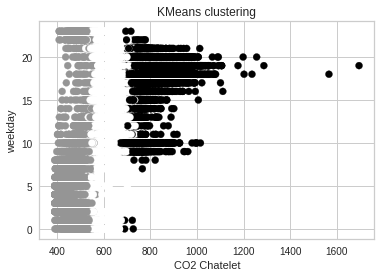

In [70]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=kmeans.labels_)
plt.title('KMeans clustering'); plt.xlabel('CO2 Chatelet'); plt.ylabel('weekday');

In [71]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

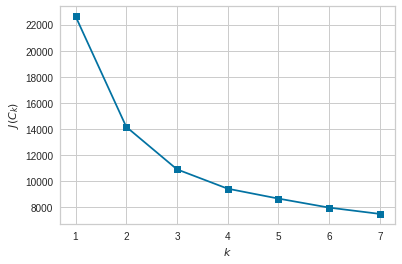

In [72]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

## Q1

In [73]:
from sklearn.metrics import mean_absolute_error

values_mae = []
days_training = []

t0 = 20000           #time stamp where the prediction starts

df_chatelet_tmp = pd.read_csv("https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/qualite-de-lair-mesuree-dans-la-station-chatelet.csv", sep=";")
df_chatelet_tmp['DATE/HEURE'] = df_chatelet_tmp['DATE/HEURE'].apply(lambda x: date_formatting_other(x))
date_tmp = str(df_chatelet_tmp['DATE/HEURE'][len(df_chatelet_tmp)-(t0+25000)])   #because at the beggining we don't consider teh first 25000 elements and reorder
date_tmp


'2018-02-20 03:00:00'

In [123]:
dtr = 3              #days before t0 used for training  LARGER THAN WINDOW = 50/24 = 2

dte = 1             #days after t0 used for testing 

dtr_ = min(4,dtr)    #dtr but for visualization
dte_ = min(2,dte)    #dte but for visualization

In [124]:
x_train = df_station_1.drop('CO2-0', 1)[t0-24*dtr:t0]
y_train = df_station_1['CO2-0'][t0-24*dtr:t0]
x_test = df_station_1.drop('CO2-0', 1)[t0:t0+24*dte]
y_test = df_station_1['CO2-0'][t0:t0+24*dte]

model = Ridge(alpha=1.0)
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [125]:
y_train_ = y_train.tolist()
y_train_pred_ = y_train_pred.tolist()
y_test_ = y_test.tolist()
y_test_pred_ = y_test_pred.tolist()

y_real = [*y_train_[24*(dtr-dtr_):], *y_test_[:24*dte_]]
y_pred = [*y_train_pred_[24*(dtr-dtr_):], *y_test_pred_[:24*dte_]]

In [126]:
mae = mean_absolute_error(y_test, y_test_pred)
mae = round(mae, 3)

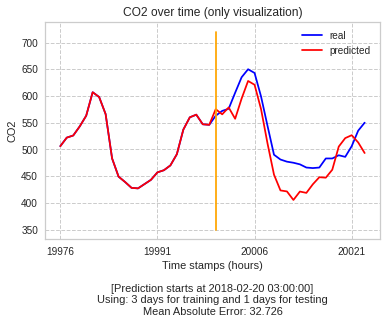

In [127]:
plt.plot(y_real, label="real", color="blue")
plt.plot(y_pred, label="predicted", color="red")

plt.title('CO2 over time (only visualization)')
plt.xlabel('Time stamps (hours)'+'\n\n[Prediction starts at '+date_tmp+']'+"\nUsing: "+str(dtr)+" days for training and "+str(dte)+" days for testing"+"\nMean Absolute Error: "+str(mae))
plt.ylabel('CO2')
plt.legend(loc="upper right")

plt.plot((24*dtr_, 24*dtr_), (350, 720), color="orange");

plt.grid(linestyle = '--')

interval = 15
rangee2 = pd.Series(range(t0-24*dtr_,t0+24*dte_,interval))
rangee1 = pd.Series(range(0,len(rangee2)*interval,interval))

plt.xticks(rangee1, rangee2)

plt.show()

In [128]:
values_mae.append(mae)
days_training.append(dtr)

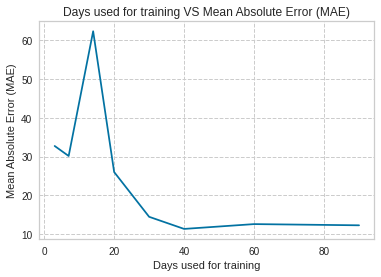

In [129]:
plt.plot(np.flip(days_training, 0), np.flip(values_mae, 0))

plt.title("Days used for training VS Mean Absolute Error (MAE)")
plt.xlabel("Days used for training")
plt.ylabel("Mean Absolute Error (MAE)")

plt.grid(linestyle = '--')
plt.show()